## ML Expt 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df= df[['QUANTITYORDERED', 'SALES']]

In [4]:
df.head()

,QUANTITYORDERED,SALES
0,30,2871.00
1,34,2765.90
2,41,3884.34
3,45,3746.70
4,49,5205.27


In [5]:
df.isna().any()

QUANTITYORDERED    False
SALES              False
dtype: bool

In [6]:
df.describe()

,QUANTITYORDERED,SALES
count,2823.000000,2823.000000
mean,35.092809,3553.889072
std,9.741443,1841.865106
min,6.000000,482.130000
25%,27.000000,2203.430000
50%,35.000000,3184.800000
75%,43.000000,4508.000000
max,97.000000,14082.800000


In [7]:
df.shape

(2823, 2)

<AxesSubplot: >

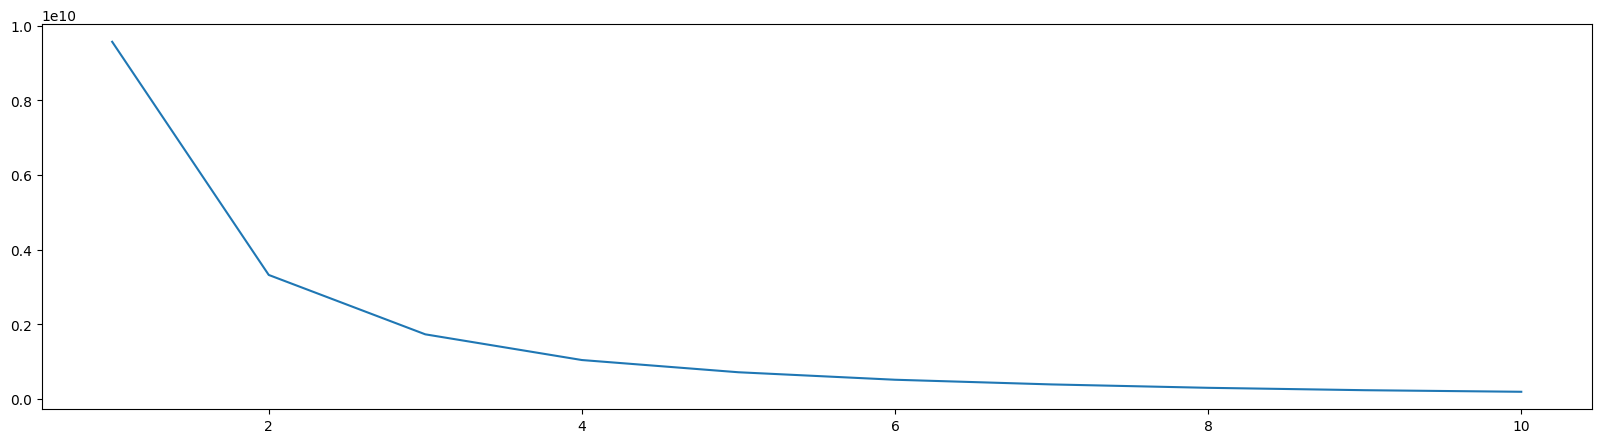

In [8]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
    
plt.figure(figsize=(20,5))
sns.lineplot(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], y = wcss)

In [9]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([0, 0, 2, ..., 2, 0, 0], dtype=int32)

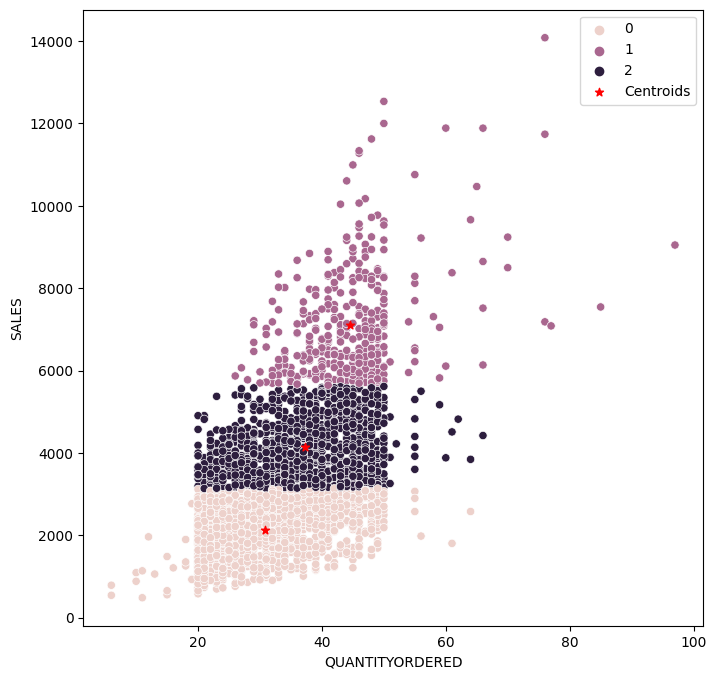

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['QUANTITYORDERED'], y=df['SALES'], hue=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', label = 'Centroids', marker='*')
plt.legend()

In [11]:
kmeans.cluster_centers_

array([[  30.82773723, 2126.31516058],
       [  44.59677419, 7099.92341398],
       [  37.22756707, 4142.83586494]])